In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os, argparse, math, random
from datetime import datetime
import errno

start_time = datetime.now()

outputPath = "../dataset/prep/2b/pca/"

if not os.path.exists(os.path.dirname(outputPath)):
    try:
        os.makedirs(os.path.dirname(outputPath))
    except OSError as exc:  # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

inputPath = "../../dataset/data_set1/"

train = ["class1.txt", "class2.txt", "class3.txt"]
test = ["classt1.txt", "classt2.txt", "classt3.txt"]

In [2]:
testData = []
trainData = []

def fileHandle(fileName):
    print("Reading: ", filename)
    wholeData = []
    file = open(fileName)
    for line in file:
        teLine = line.rstrip('\n ').split(' ')
        nLine = [float(i) for i in teLine]
        nLine = np.array(nLine)
        nLine = np.insert(nLine, 0, 1, axis=0)
        wholeData.append(nLine)
    file.close()
#     print(wholeData)
    return wholeData

def fileHandle2(fileName):
    print("Reading: ", filename)
    wholeData = []
    file = open(fileName)
    for line in file:
        teLine = line.rstrip('\n ').split(' ')
        nLine = [float(i) for i in teLine]
        nLine = np.array(nLine)
#         nLine = np.insert(nLine, 0, 1, axis=0)
        wholeData.append(nLine)
    file.close()
#     print(wholeData)
    return wholeData

count = 0
trainDataOrig = []

for filename in train:
    val = fileHandle(inputPath + filename)
    trainData.append(val)
    trainDataOrig.append(fileHandle2(inputPath + filename))
#     print(filename)
#     print(val)
for filename in test:
    val = fileHandle(inputPath + filename)
    testData.append(val)
#     print(filename)
#     print(val)


testData = np.array(testData)
trainData = np.array(trainData)
trainDataOrig = np.array(trainDataOrig)

print(testData.shape)
print(trainData.shape)

Reading:  class1.txt
Reading:  class1.txt
Reading:  class2.txt
Reading:  class2.txt
Reading:  class3.txt
Reading:  class3.txt
Reading:  classt1.txt
Reading:  classt2.txt
Reading:  classt3.txt
(3, 125, 3)
(3, 375, 3)


In [3]:
def onePerceptron(data1, data2, dimension, neta):
#     dimensions = len(data[0])
    
#     w0 = 1
    aVect = np.zeros(dimension+1)
    for i in range(dimension+1):
        aVect[i] = 1
        
    summer = 0
#     w0summer = 0
    
    wrong = len(data1) + len(data2)
    
    iterCount = 0
    while wrong > 0 :
        wrong = 0
#         print("Iteration : ", iterCount)
        for point in data1:
            if aVect.T.dot(point) < 0:
                summer += point
#                 w0summer += 1
                wrong += 1
        for point in data2:
            if aVect.T.dot(point) > 0:
                summer -= point
#                 w0summer -= 1
                wrong += 1
        
        aVect += neta * summer
#         w0 += neta * w0summer
        iterCount += 1
    return aVect


In [4]:
resultsArray = []
aVectArray = []
w0Array = []

for i in range(3):
    for j in range(i+1, 3):
        print("Classes : ",i," vs ",j)
        aVect = onePerceptron(trainData[i], trainData[j], 2, 0.01)
        aVectArray.append(aVect)
#         w0Array.append(w0)
        
## Decision

confusionMatrix = []
for i in range(3):
    row = np.zeros(3)
    
    for point in testData[i]:
        ans = 0
        dec = np.zeros(3)
        
        dec[0] = 0 if ( aVectArray[0].T.dot(point) > 0 ) else 1
        dec[1] = 0 if ( aVectArray[1].T.dot(point) > 0 ) else 2
        dec[2] = 1 if ( aVectArray[2].T.dot(point) > 0 ) else 2
        
        xd = np.zeros(3)
        for x in dec:
            xd[int(x)] += 1
            
        if(xd[np.argmax(xd)] > 1):
            ans = np.argmax(xd)
#         print(ans)
        row[ans] += 1
    confusionMatrix.append(row)
    
print(confusionMatrix)

def decideClass(point):
    ans = 0
    dec = np.zeros(3)

    dec[0] = 0 if ( aVectArray[0].T.dot(point) > 0 ) else 1
    dec[1] = 0 if ( aVectArray[1].T.dot(point) > 0 ) else 2
    dec[2] = 1 if ( aVectArray[2].T.dot(point) > 0 ) else 2

#     xd = np.zeros(3)
#     for x in dec:
#         xd[int(x)] += 1

#     if(xd[np.argmax(xd)] > 1):
#         ans = np.argmax(xd)
    return dec


Classes :  0  vs  1
Classes :  0  vs  2
Classes :  1  vs  2
[array([125.,   0.,   0.]), array([  0., 125.,   0.]), array([  0.,   0., 125.])]


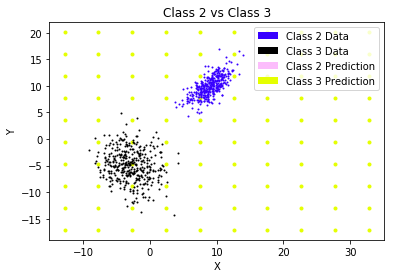

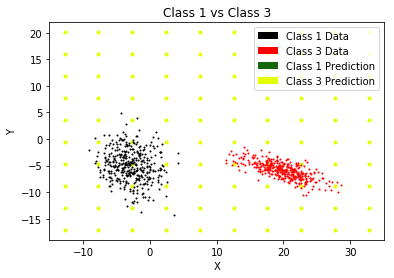

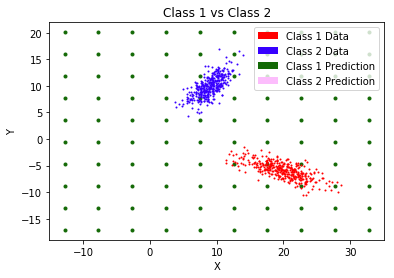

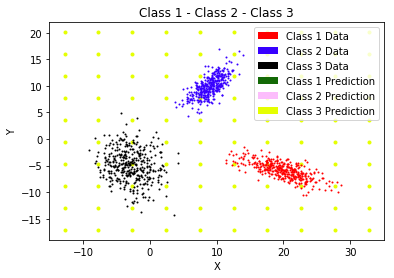

In [5]:
def plot():
    mainList = trainDataOrig
    numFeature = 2
    nClass = 3
    
    
    minMax = np.zeros((numFeature,2))
    colors = ['#136906', '#fcbdfc', '#e5ff00', '#ff0000', '#3700ff', '#000000']

    # Resolution affects the time required to process.
    res = 200

    count = 0
    for i in range(nClass):
        for j in range(numFeature):
            if count == 0:
                minMax[j, 0] = np.ceil(np.amin(mainList[i][:, j]))
                minMax[j, 1] = np.ceil(np.amax(mainList[i][:, j]))
            else:
                minMax[j, 0] = min(minMax[j,0], np.ceil(np.amin(mainList[i][:, j])))
                minMax[j, 1] = max(minMax[j,1], np.ceil(np.amax(mainList[i][:, j])))
            count = 1

    dataRange = np.zeros((numFeature))
    for i in range(numFeature):
        dataRange[i] = 0.1*(minMax[i, 1] - minMax[i, 0])

    x = np.linspace(minMax[0, 0] - dataRange[0], minMax[0, 1] + dataRange[0], res)
    y = np.linspace(minMax[1,0] - dataRange[1], minMax[1,1] + dataRange[1], res)

    tellClassNum = []#np.zeros((np.size(x,0)*np.size(y,0), nClass))

    count = 0
    for j in y:
        for i in x:
            dataPt = np.array([1, i, j])
            a = decideClass(dataPt)
            tellClassNum.append(a)
            count += 1

    for idx in range(nClass+1):
        fig1 = plt.figure(1)
        ax = fig1.gca()

        plotClass = []
        for cl in range(nClass):
            temp1 = []
            for fe in range(numFeature):
                temp1.append([])
            plotClass.append(temp1)

        class_colours = []
        classes = []
        count = 0
        for j in y:
            for i in x:
                tempArr = tellClassNum[count]
#                 if idx == 0:
#                     print(tempArr)
                xd = np.zeros(3)
                    
                classNum = 0
                if idx == 0:
                    classNum = tempArr[2]
                elif idx == 1:
                    classNum = tempArr[1]
                elif idx == 2:
                    classNum = tempArr[0]
                else:
                    for x1 in tempArr:
                        xd[int(x1)] += 1
                    if(xd[np.argmax(xd)] > 1):
                        classNum = np.argmax(xd)
                
#                 print(classNum)
                plotClass[int(classNum)][0].append(i)
                plotClass[int(classNum)][1].append(j)
                count += 1

        plotname = ".png"

        if idx==0:
            ax.plot(plotClass[1][0], plotClass[1][1], c=colors[1],marker=".",  linestyle="None", label="Class 2 Prediction")
            ax.plot(plotClass[2][0], plotClass[2][1], c=colors[2],marker=".",  linestyle="None", label="Class 3 Prediction")
            ax.plot(mainList[1][:,0], mainList[1][:,1], c=colors[4], marker=".",  linestyle="None", label="Class 2 Data", ms='2')
            ax.plot(mainList[2][:,0], mainList[2][:,1], c=colors[5], marker=".",  linestyle="None", label="Class 3 Data", ms='2')
            class_colours = [colors[4], colors[5], colors[1], colors[2]]
            classes = ["Class 2 Data", "Class 3 Data", "Class 2 Prediction", "Class 3 Prediction"]
            plotname = "23"+plotname
        elif idx==1:
            ax.plot(plotClass[0][0], plotClass[0][1], c=colors[0],marker=".", linestyle="None", label="Class 1 Prediction")
            ax.plot(plotClass[2][0], plotClass[2][1], c=colors[2],marker=".", linestyle="None", label="Class 3 Prediction")
            ax.plot(mainList[0][:,0], mainList[0][:, 1], c=colors[3], marker=".", linestyle="None", label="Class 1 Data", ms='2')
            ax.plot(mainList[2][:,0],mainList[2][:,1], c=colors[5], marker=".", linestyle="None", label="Class 3 Data", ms='2')
            class_colours = [colors[5], colors[3], colors[0], colors[2]]
            classes = ["Class 1 Data", "Class 3 Data", "Class 1 Prediction", "Class 3 Prediction"]
            plotname = "13" + plotname
        elif idx==2:
            ax.plot(plotClass[0][0], plotClass[0][1], c = colors[0],marker=".",  linestyle="None", label="Class 1 Prediction")
            ax.plot(plotClass[1][0], plotClass[1][1], c = colors[1],marker=".",  linestyle="None", label="Class 2 Prediction")
            ax.plot(mainList[0][:,0],mainList[0][:,1], c=colors[3], marker=".",  linestyle="None", label="Class 1 Data", ms='2')
            ax.plot(mainList[1][:,0],mainList[1][:,1], c = colors[4], marker=".",  linestyle="None", label="Class 2 Data", ms='2')
            class_colours = [colors[3], colors[4], colors[0], colors[1]]
            classes = ["Class 1 Data", "Class 2 Data", "Class 1 Prediction", "Class 2 Prediction"]
            plotname = "12" + plotname
        else:
            ax.plot(plotClass[0][0], plotClass[0][1], c = colors[0],marker=".",  linestyle="None", label="Class 1 Prediction")
            ax.plot(plotClass[1][0], plotClass[1][1], c = colors[1],marker=".",  linestyle="None", label="Class 2 Prediction")
            ax.plot(plotClass[2][0], plotClass[2][1], c=colors[2],marker=".",  linestyle="None", label="Class 3 Prediction")
            ax.plot(mainList[0][:,0],mainList[0][:,1], c = colors[3], marker=".",  linestyle="None", label="Class 1 Data", ms='2')
            ax.plot(mainList[1][:,0],mainList[1][:,1], c = colors[4], marker=".",  linestyle="None", label="Class 2 Data", ms='2')
            ax.plot(mainList[2][:,0],mainList[2][:,1], c = colors[5], marker=".",  linestyle="None", label="Class 3 Data", ms='2')
            class_colours = [colors[3], colors[4], colors[5], colors[0], colors[1], colors[2]]
            classes = ["Class 1 Data", "Class 2 Data", "Class 3 Data", "Class 1 Prediction", "Class 2 Prediction", "Class 3 Prediction"]
            plotname = "123" + plotname
        ax.patch.set_visible(False)
        if idx == 0:
            plt.title("Class 2 vs Class 3")
        elif idx == 1:
            plt.title("Class 1 vs Class 3")
        elif idx == 2:
            plt.title("Class 1 vs Class 2")
        else:
            plt.title("Class 1 - Class 2 - Class 3")
        plotname = outputPath + plotname
        plt.xlabel('X')
        plt.ylabel('Y')
        recs = []
        for i in range(0,len(class_colours)):
            recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
        plt.legend(recs, classes, loc='upper right')
        plt.savefig(plotname)
#         plt.show()
        
plot()

In [36]:
precision = []
for i in range(3):
    s = 0
    for j in range(3):
        s += confusionMatrix[i][j]
    p = confusionMatrix[i][i]/s
    precision.append(p)
    
recall = []
for i in range(3):
    s = 0
    for j in range(3):
        s += confusionMatrix[j][i]
    r = confusionMatrix[i][i]/s
    recall.append(r)
    
fMeasure = []

for i in range(3):
    fMeasure.append((2*precision[i]*recall[i])/(precision[i]+recall[i]))

s = 0
correct = 0
for i in range(3):
    correct += confusionMatrix[i][i]
    for j in range(3):
        s += confusionMatrix[i][j]
accuracy = correct/s

print("precision: \t",precision)
print("recall: \t", recall)
print("F Measure: \t", fMeasure)
print("Accuracy: ", accuracy)

precision: 	 [1.0, 1.0, 1.0]
recall: 	 [1.0, 1.0, 1.0]
F Measure: 	 [1.0, 1.0, 1.0]
Accuracy:  1.0


In [17]:
a = np.array([1,2,3])
b = np.array([5,6,7])

c = a
c += b
print(c)

print(np.insert(a,0,1,axis=0))

[ 6  8 10]
[ 1  6  8 10]
